In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import snsborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [89]:
#Reading csv and loading as data frame
loan_df = pd.read_csv('loan.csv')

### Data Inspection

In [90]:
#looking if there are any headers available
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [91]:
#looking if there are any footers available
loan_df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
#Printing number of rows and columns
loan_df.shape

(39717, 111)

In [93]:
loan_df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [94]:
#Current running loans will not provide any insight to default; dropping rows related to current loans
loan_df = loan_df[~(loan_df['loan_status'] == 'Current')]

In [95]:
#around 1100+ rows were removed
loan_df.shape

(38577, 111)

In [96]:
#columns which are not relevant to loan decision
columns_having_post_loan_data=['acc_now_delinq', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'earliest_cr_line', 'delinq_amnt',
                              'last_pymnt_amnt', 'last_pymnt_d', 'mths_since_last_delinq', 'next_pymnt_d', 'out_prncp', 'out_prncp_inv', 'recoveries', 'total_bal_il',
                              'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp']

In [97]:
loan_df = loan_df.drop(columns_having_post_loan_data, axis=1)

In [98]:
#checking percentage of missing values in data frame
100 * loan_df.isna().sum() / len(loan_df)

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.101097
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 92, dtype: float64

In [99]:
#Many columns had all values as NA; dropping those columns
loan_df = loan_df.dropna(how='all', axis=1)

In [100]:
loan_df.shape

(38577, 39)

In [101]:
feature_wise_unique_values = loan_df.nunique()
feature_wise_unique_values.sort_values()
type(feature_wise_unique_values)

pandas.core.series.Series

In [102]:
#removing columns having only 1 unique value
columns_to_drop = feature_wise_unique_values[feature_wise_unique_values == 1].index
loan_df = loan_df.drop(columns_to_drop, axis=1)

In [103]:
columns_having_all_distinct_values = feature_wise_unique_values[feature_wise_unique_values == len(loan_df)].index
loan_df = loan_df.drop(columns_having_all_distinct_values, axis=1)

In [104]:
loan_df.shape

(38577, 31)

In [105]:
#checking percentage of missing values in data frame
100 * loan_df.isna().sum() / len(loan_df)

loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  6.185033
emp_length                 2.677761
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
desc                      32.477901
purpose                    0.000000
title                      0.028514
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
inq_last_6mths             0.000000
mths_since_last_record    92.897322
open_acc                   0.000000
pub_rec                    0.000000
revol_bal                  0.000000
revol_util                 0

In [106]:
#removing mths_since_last_record column as it is missing more than 90% values
loan_df = loan_df.drop('mths_since_last_record', axis=1)

In [107]:
#dropping 'desc' columns as it is having multiple paragraphs and will not be meaningful for EDA
loan_df = loan_df.drop('desc', axis=1)

In [108]:
100 * loan_df.isna().sum() / len(loan_df)

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.185033
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.028514
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.129611
total_acc               0.000000
last_credit_pull_d      0.005184
pub_rec_bankruptcies    1.806776
dtype: float64

In [109]:
loan_df.shape

(38577, 29)

In [110]:
loan_df[loan_df['pub_rec_bankruptcies'].isna()]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
35006,15000,15000,14875.000000,36 months,8.94%,476.58,A,A5,NaN,< 1 year,...,7.07,0,1,6,0,7586,52.70%,19,Aug-15,NaN
35058,3000,3000,2988.236621,36 months,14.26%,102.92,C,C5,NaN,3 years,...,14.97,1,0,13,0,4740,39.50%,23,Sep-12,NaN
35362,4000,4000,3892.258856,36 months,11.14%,131.22,B,B1,"Infotrieve, Inc.",< 1 year,...,11.08,0,0,14,0,24220,68.60%,33,May-16,NaN
38443,2300,2300,589.605658,36 months,13.17%,77.69,D,D2,UBS,10+ years,...,2.26,0,0,4,0,2211,88.40%,13,May-16,NaN
38717,6000,6000,500.000000,36 months,8.00%,188.02,A,A3,NaN,< 1 year,...,16.08,0,1,16,0,29797,23.20%,39,May-11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.000000,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,...,11.33,0,0,13,0,7274,13.10%,40,Jun-10,NaN
39713,8500,8500,875.000000,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,...,6.40,1,1,6,0,8847,26.90%,9,Jul-10,NaN
39714,5000,5000,1325.000000,36 months,8.07%,156.84,A,A4,NaN,< 1 year,...,2.30,0,0,11,0,9698,19.40%,20,Jun-07,NaN
39715,5000,5000,650.000000,36 months,7.43%,155.38,A,A2,NaN,< 1 year,...,3.72,0,0,17,0,85607,0.70%,26,Jun-07,NaN


In [111]:
#697 rows are missing pub_rec_bankruptcies value
loan_df['pub_rec_bankruptcies'].describe()

count    37880.000000
mean         0.043479
std          0.204583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [112]:
loan_df['pub_rec_bankruptcies'] = loan_df['pub_rec_bankruptcies'].fillna(loan_df['pub_rec_bankruptcies'].median())

In [113]:
#again checking percentage of missing values in data frame
100 * loan_df.isna().sum() / len(loan_df)

loan_amnt               0.000000
funded_amnt             0.000000
funded_amnt_inv         0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               6.185033
emp_length              2.677761
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.028514
zip_code                0.000000
addr_state              0.000000
dti                     0.000000
delinq_2yrs             0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.129611
total_acc               0.000000
last_credit_pull_d      0.005184
pub_rec_bankruptcies    0.000000
dtype: float64

In [114]:
#As percentage of rows missing last_credit_pull_d value is very less; dropping those rows
loan_df = loan_df[~loan_df['last_credit_pull_d'].isna()]

In [115]:
#only lost 2 rows out of 38577 rows
loan_df.shape

(38575, 29)

In [116]:
#Dropping rows missing revol_util, emp_length and title values as well
loan_df = loan_df[~loan_df['revol_util'].isna()]
loan_df = loan_df[~loan_df['emp_length'].isna()]
loan_df = loan_df[~loan_df['title'].isna()]

In [117]:
#Dropping emp_title as well; it is non-ordinal categorical data and it is highly scattered
100 * loan_df['emp_title'].value_counts() / len (loan_df)

emp_title
US Army                0.349473
Bank of America        0.285448
IBM                    0.173403
AT&T                   0.152061
Kaiser Permanente      0.149393
                         ...   
BOEMRE                 0.002668
Collins Stewart LLC    0.002668
Macy's East Inc.       0.002668
westin                 0.002668
Evergreen Center       0.002668
Name: count, Length: 27937, dtype: float64

In [118]:
loan_df = loan_df.drop('emp_title', axis=1)
loan_df = loan_df.drop('sub_grade', axis=1) # dropping sub_grade too

In [119]:
#lost around 90+ rows
loan_df.shape

(37485, 27)

In [120]:
#again checking percentage of missing values in data frame
100 * loan_df.isna().sum() / len(loan_df)

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
title                   0.0
zip_code                0.0
addr_state              0.0
dti                     0.0
delinq_2yrs             0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
last_credit_pull_d      0.0
pub_rec_bankruptcies    0.0
dtype: float64

#### All missing values are handled now. We will start with data type checks and do appropriate conversions

In [121]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37485 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37485 non-null  int64  
 1   funded_amnt           37485 non-null  int64  
 2   funded_amnt_inv       37485 non-null  float64
 3   term                  37485 non-null  object 
 4   int_rate              37485 non-null  object 
 5   installment           37485 non-null  float64
 6   grade                 37485 non-null  object 
 7   emp_length            37485 non-null  object 
 8   home_ownership        37485 non-null  object 
 9   annual_inc            37485 non-null  float64
 10  verification_status   37485 non-null  object 
 11  issue_d               37485 non-null  object 
 12  loan_status           37485 non-null  object 
 13  purpose               37485 non-null  object 
 14  title                 37485 non-null  object 
 15  zip_code              37

In [122]:
loan_df['term'].value_counts()

term
36 months    28234
60 months     9251
Name: count, dtype: int64

In [123]:
loan_df['int_rate'].value_counts()

int_rate
10.99%    891
11.49%    765
7.51%     756
13.49%    736
7.88%     701
         ... 
16.33%      1
16.15%      1
16.01%      1
10.64%      1
16.20%      1
Name: count, Length: 370, dtype: int64

In [124]:
#converting int_rate column values to float
loan_df['int_rate'] = loan_df['int_rate'].apply(lambda x: float(x[:-1]))

In [125]:
loan_df['revol_util'].value_counts()

revol_util
0%        918
63%        61
0.20%      61
40.70%     56
61%        55
         ... 
77.63%      1
25.74%      1
0.83%       1
47.36%      1
7.28%       1
Name: count, Length: 1086, dtype: int64

In [126]:
loan_df['revol_util'] = loan_df['revol_util'].apply(lambda x: float(x[:-1]))

In [127]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37485 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37485 non-null  int64  
 1   funded_amnt           37485 non-null  int64  
 2   funded_amnt_inv       37485 non-null  float64
 3   term                  37485 non-null  object 
 4   int_rate              37485 non-null  float64
 5   installment           37485 non-null  float64
 6   grade                 37485 non-null  object 
 7   emp_length            37485 non-null  object 
 8   home_ownership        37485 non-null  object 
 9   annual_inc            37485 non-null  float64
 10  verification_status   37485 non-null  object 
 11  issue_d               37485 non-null  object 
 12  loan_status           37485 non-null  object 
 13  purpose               37485 non-null  object 
 14  title                 37485 non-null  object 
 15  zip_code              37

#All values are appropriately converted
#### Univariate Analysis

In [128]:
#getting all categorical columns
list(loan_df.select_dtypes(include='object'))

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'last_credit_pull_d']

In [129]:
100 * loan_df['term'].value_counts() / len(loan_df)

term
36 months    75.320795
60 months    24.679205
Name: count, dtype: float64

##### <font color='green'> Conclusion 1: around 75% loans are of 36 months duration </font>

In [130]:
100 * loan_df['grade'].value_counts() / len(loan_df)

grade
B    30.289449
A    25.764973
C    20.424170
D    13.231959
E     6.957450
F     2.542350
G     0.789649
Name: count, dtype: float64

##### <font color='green'>Conclusion 2: Most of the loans belong to A, B, C and D grade </font>

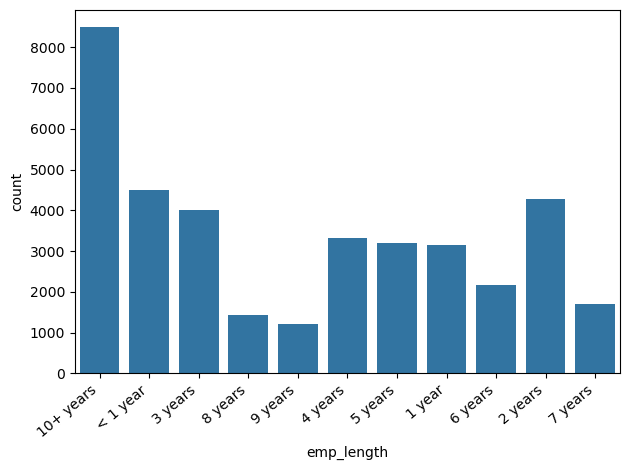

In [135]:
ax = sns.countplot(loan_df, x = 'emp_length')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

#### <font color='red'> Note: emp_length is not very conclusive, a segmented analysis might help </font>

<Axes: xlabel='home_ownership'>

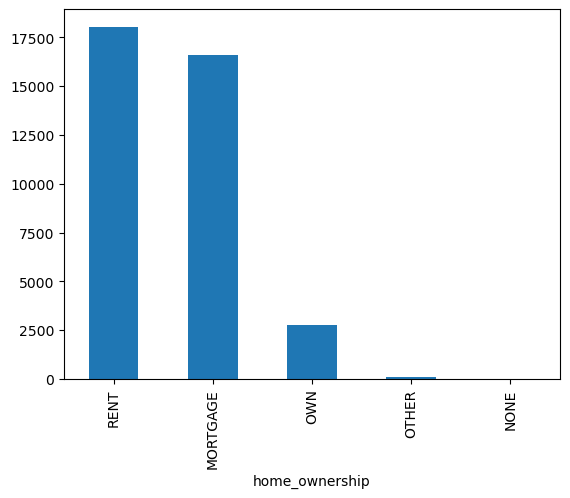

In [136]:
loan_df['home_ownership'].value_counts().plot.bar()

##### <font color='green'>Conclusion 3 : Most people belong to rent and mortgage type ownership</font>

<Axes: ylabel='count'>

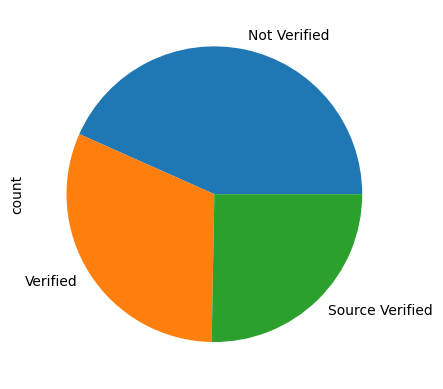

In [144]:
loan_df['verification_status'].value_counts().plot(kind="pie")

##### <font color='green'>Conclusion 4 : Most of the loans were not verified</font>

<Axes: xlabel='purpose'>

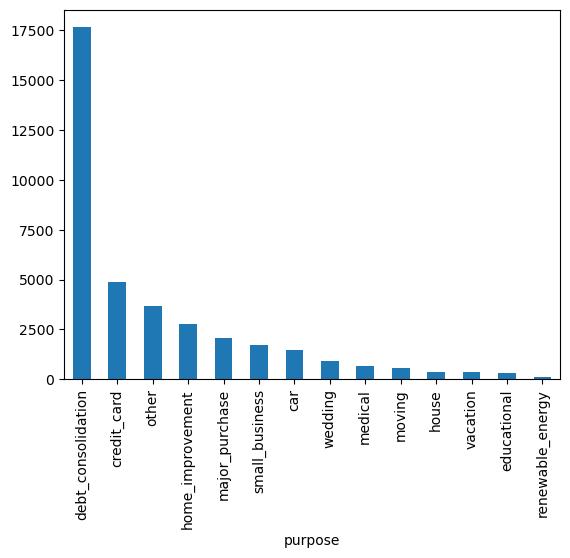

In [145]:
loan_df['purpose'].value_counts().plot.bar()

##### <font color='green'>Conclusion 5 : Most of the loans were for debt consolidation purpose</font>

<Axes: ylabel='count'>

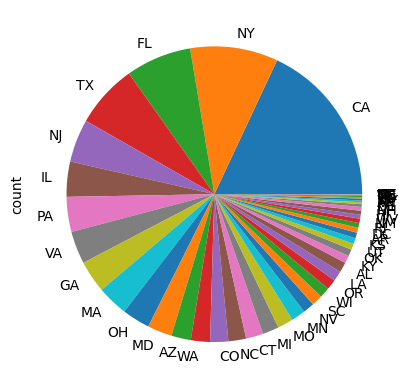

In [146]:
#using Pie plot to visualize
loan_df['addr_state'].value_counts().plot(kind="pie")

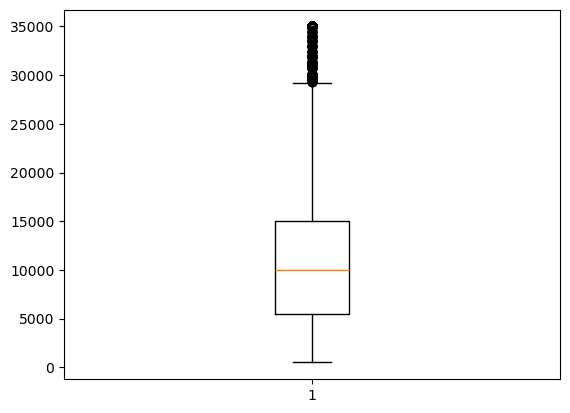

In [168]:
plt.boxplot(loan_df['loan_amnt'],)
plt.show()

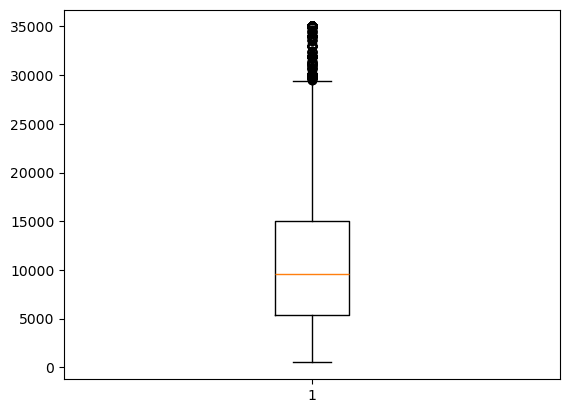

In [169]:
plt.boxplot(loan_df['funded_amnt'])
plt.show()

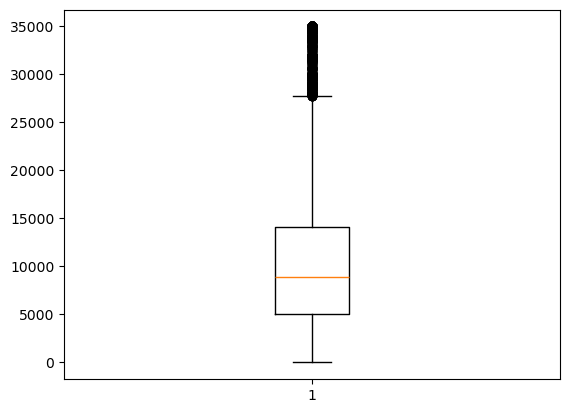

In [171]:
plt.boxplot(loan_df['funded_amnt_inv'])
plt.show()

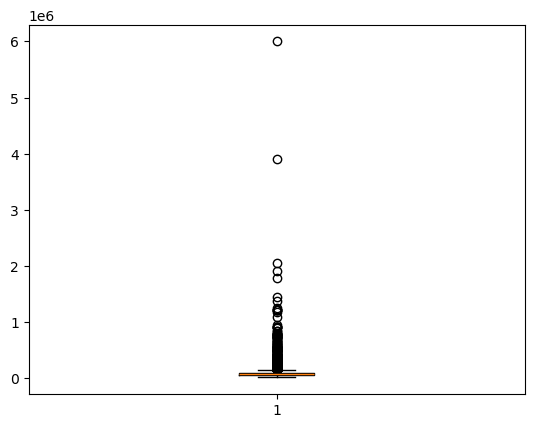

In [172]:
plt.boxplot(loan_df['annual_inc'])
plt.show()

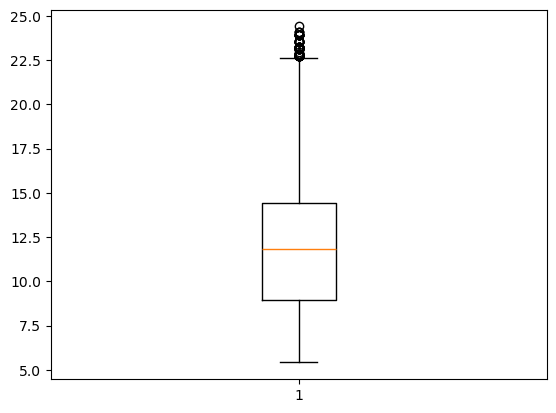

In [173]:
plt.boxplot(loan_df['int_rate'])
plt.show()

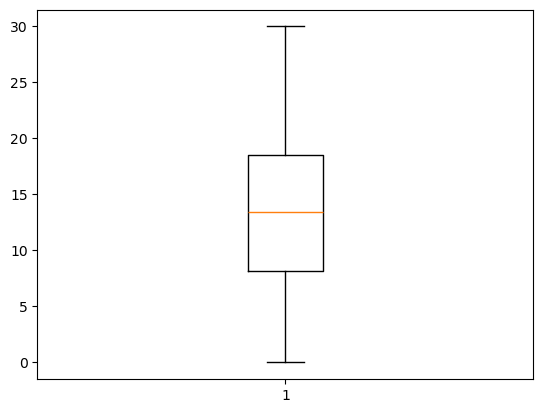

In [174]:
plt.boxplot(loan_df['dti'])
plt.show()

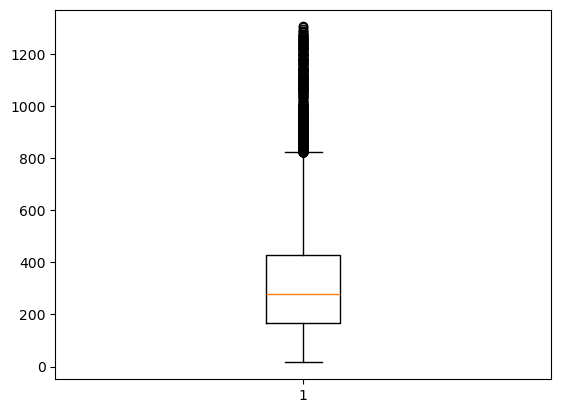

In [175]:
plt.boxplot(loan_df['installment'])
plt.show()

### Derived Metrics for Segmented Analysis

##### <font color='green'>Conclusion 6 : There are outliers in loan_amnt, funded_amt, installment, funded_amnt_inv, int_rate, annual_inc</font>

In [176]:
#Removing outliers
outliers_columns_set1= ['loan_amnt', 'funded_amnt', 'funded_amnt_inv']
outliers_columns_set2=['int_rate', 'installment', 'annual_inc']
# Define a function to remove outliers based on IQR
def remove_outliers_iqr(data, columns,threshold):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove outliers from the DataFrame
loan_df =remove_outliers_iqr(loan_df, outliers_columns_set1,1.5)
loan_df =remove_outliers_iqr(loan_df, outliers_columns_set2,1.5)

In [178]:
column_titles = {
    'loan_amnt': 'Loan Amount',
    'funded_amnt': 'Funded Amount',
    'funded_amnt_inv': 'Funded Amount Investors',
    'term': 'Loan Term',
    'int_rate': 'Interest Rate',
    'installment': 'Installment',
    'grade': 'Grade',
    'emp_length': 'Employment Length',
    'home_ownership': 'Home Owner Status',
    'annual_inc': 'Annuap Income',
    'verification_status': 'Verification Status',
    'issue_d': 'Issue Date',
    'loan_status': 'Loan Status',
    'purpose': 'Purpose of Loan',
    'addr_state': 'State',
    'dti': 'Debt To Income Ratio',
    'pub_rec_bankruptcies': 'Bankruptcies Record',
    'issue_y': 'Issue Year',
    'issue_m': 'Issue Month',
    'issue_q': 'Issue Quarter',
    'loan_amnt_b': 'Loan Amount Bins',
    'funded_amnt_inv_b': 'Investor Funded Bins',
    'funded_amnt_b': 'Funded Amount Bins',
    'annual_inc_b': 'Annual Income Bins',
    'int_rate_b': 'Interest Rate Bins',
    'dti_b': 'DTI Bins'
}

In [181]:
def plt_diagram(df, column):
    # Assuming column_titles is a dictionary that maps column names to more user-friendly titles.
    column_titles = {
        column: column.replace('_', ' ').title()  # Example transformation
    }

    fig, p = plt.subplots(1, 2, figsize=(16, 4))
    sns.distplot(df.loc[df[column].notnull(), column], kde=True, hist=True, ax=p[0])
    sns.boxplot(x=column, data=df, ax=p[1])
    p[0].set_xlabel(column_titles.get(column, column))
    p[1].set_xlabel(column_titles.get(column, column))
    plt.tight_layout()
    plt.show()

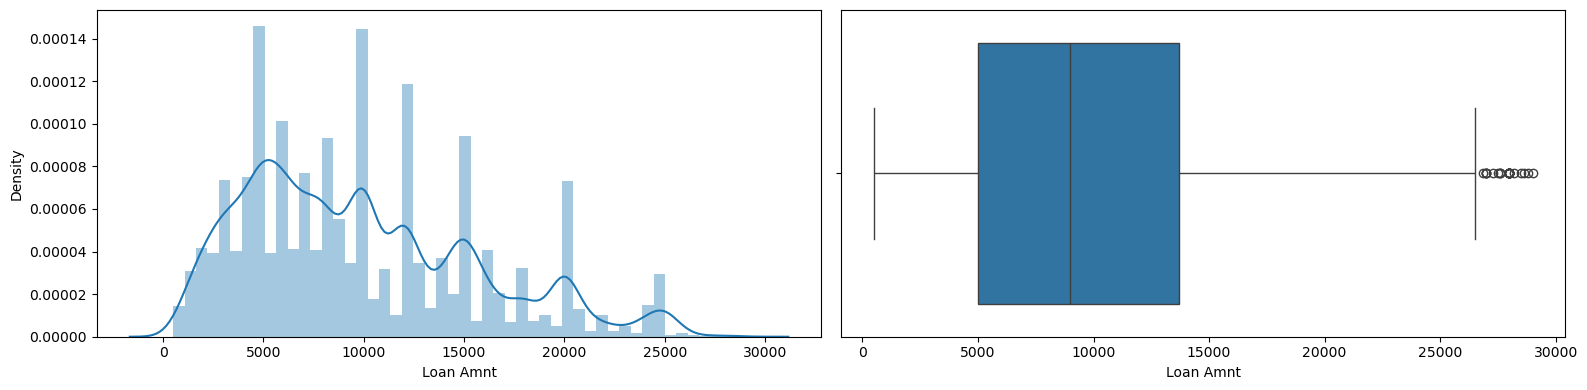

count    33747.000000
mean      9806.327229
std       5792.419515
min        500.000000
25%       5000.000000
50%       9000.000000
75%      13712.500000
max      29000.000000
Name: loan_amnt, dtype: float64

In [182]:
plt_diagram(loan_df, 'loan_amnt')
loan_df['loan_amnt'].describe()

##### <font color='green'> Conclusion 7: Most loan amounts are between 5000 to 14000 </font>

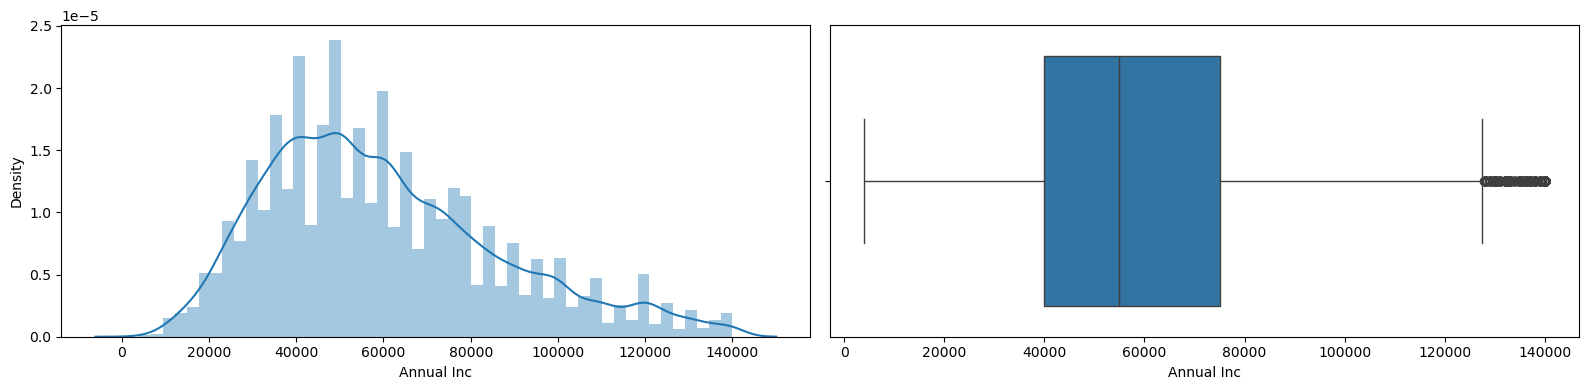

count     33747.000000
mean      59844.990649
std       26936.390251
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      140000.000000
Name: annual_inc, dtype: float64

In [183]:
plt_diagram(loan_df, 'annual_inc')
loan_df['annual_inc'].describe()

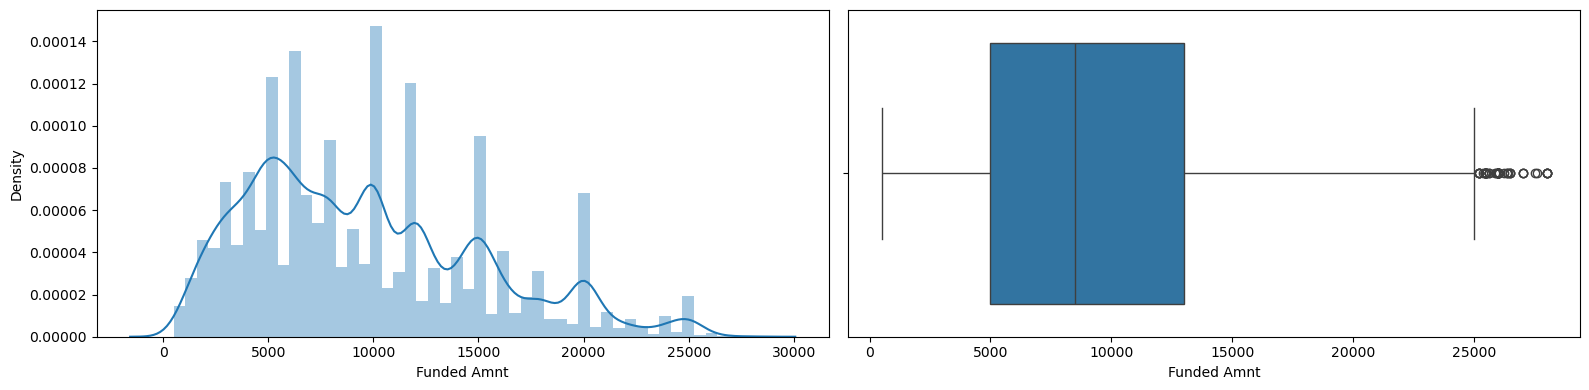

count    33747.000000
mean      9581.512431
std       5550.702633
min        500.000000
25%       5000.000000
50%       8500.000000
75%      13000.000000
max      28000.000000
Name: funded_amnt, dtype: float64

In [184]:
plt_diagram(loan_df, 'funded_amnt')
loan_df['funded_amnt'].describe()

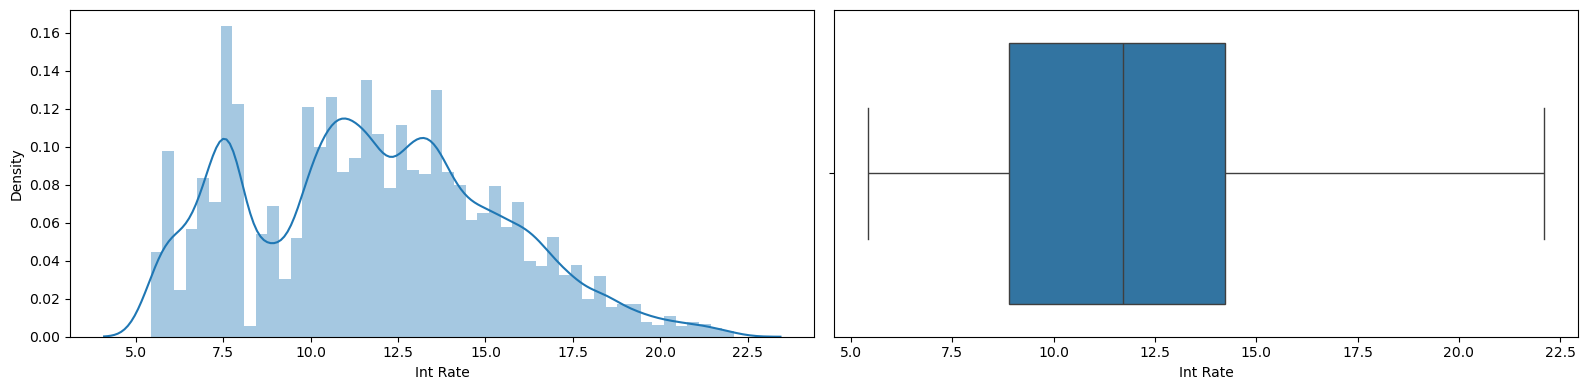

count    33747.000000
mean        11.753676
std          3.570157
min          5.420000
25%          8.900000
50%         11.710000
75%         14.220000
max         22.110000
Name: int_rate, dtype: float64

In [185]:
plt_diagram(loan_df, 'int_rate')
loan_df['int_rate'].describe()

In [147]:
loan_df['emp_length'].value_counts()

emp_length
10+ years    8486
< 1 year     4494
2 years      4286
3 years      4008
4 years      3333
5 years      3187
1 year       3162
6 years      2164
7 years      1707
8 years      1433
9 years      1225
Name: count, dtype: int64

In [155]:
#0-3 Junior
#4-6 Mid
#6-9 Senior
#10+ Very Senior
def get_employee_level(value):
    if value == '10+ years':
        return 'Very Senior'
    elif value ==  '< 1 year':
        return 'Junior'
    else: 
        value = value.replace(' years', '')
        if value in '123':
            return 'Junior'
        elif value in '456':
            return 'Mid'
        else:
            return 'Senior'
            
loan_df['emp_level'] = loan_df['emp_length'].apply(lambda x: get_employee_level(x))

In [156]:
loan_df['emp_level'].value_counts()

emp_level
Junior         12788
Mid             8684
Very Senior     8486
Senior          7527
Name: count, dtype: int64

In [162]:
loan_df['issue_d'] = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df['last_credit_pull_d'] = pd.to_datetime(loan_df.last_credit_pull_d, format='%b-%y')


In [164]:
loan_df['issue_d_year'] = pd.DatetimeIndex(loan_df['issue_d']).year


In [165]:
loan_df['issue_d_month'] = pd.DatetimeIndex(loan_df['issue_d']).month

In [186]:
loan_df['last_credit_pull_d_month'] = pd.DatetimeIndex(loan_df['last_credit_pull_d']).month

In [187]:
loan_df['last_credit_pull_d_year'] = pd.DatetimeIndex(loan_df['last_credit_pull_d']).year

#### Bivariate Analysis

In [188]:
# Define income bins and labels
bins = [0, 25000, 50000, 75000, 100000, float('inf')]
labels = ['0-25k', '25-50k', '50-75k', '75-100k', '100-150k']

# Create binned column for annual income
loan_df['annual_inc_b'] = pd.cut(loan_df['annual_inc'], bins=bins, labels=labels, right=False)

#Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = loan_df.groupby(['annual_inc_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off']+ inc_range_vs_loan['Fully Paid']
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-25k,378,1650,2028,0.186391
1,25-50k,1873,9663,11536,0.162361
2,50-75k,1584,9628,11212,0.141277
3,75-100k,645,4978,5623,0.114707
4,100-150k,312,3036,3348,0.093190


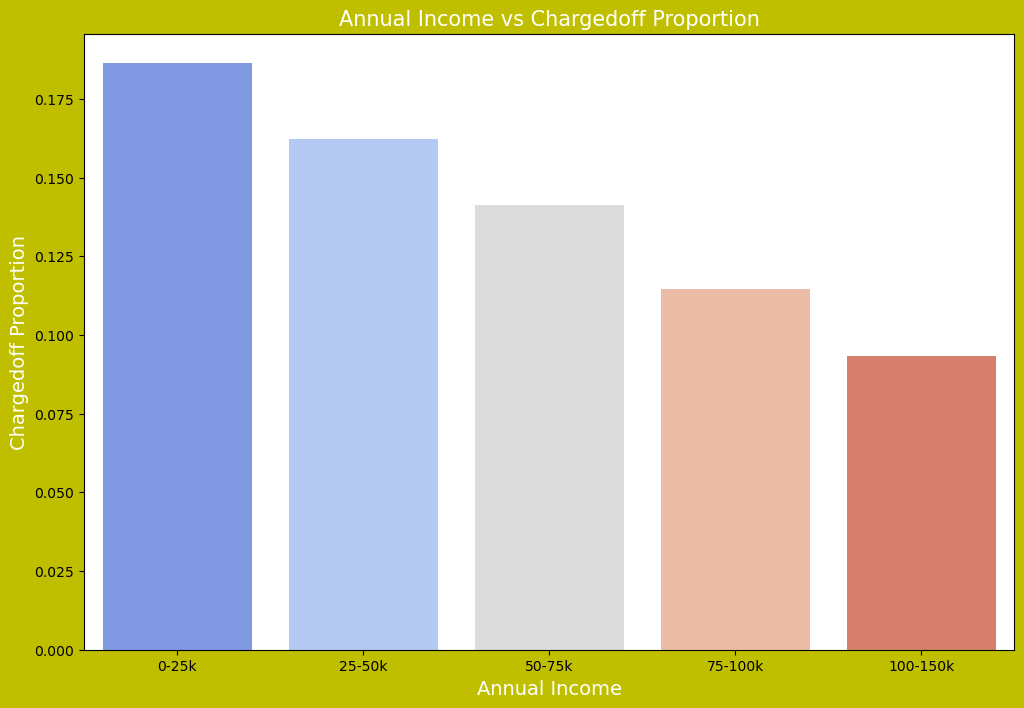

In [189]:
# Drawing bar plots on data calculated above. Try to visualize the pattern to understand the data better.

import matplotlib.pyplot as plt
import snsborn as sns

# Create the bar plot with a color palette
fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='y')
ax1.set_title('Annual Income vs Chargedoff Proportion', fontsize=15, color='w')

# Set the color palette and create the bar plot
palette = sns.color_palette("coolwarm", len(inc_range_vs_loan))  # Example color palette
ax1 = sns.barplot(x='annual_inc_b', y='Chargedoff_Proportion', data=inc_range_vs_loan, palette=palette)

# Customize labels
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='w')
ax1.set_xlabel('Annual Income', fontsize=14, color='w')

plt.show()


# Observations:
# Income range 80000+  has less chances of charged off.
# Income range 0-20000 has high chances of charged off.
# Notice that with increase in annual income charged off proportion got decreased.

In [190]:
#Bivariate Analysis on Intrest rate  against Chargedoff_Proportion -
# Define bins and labels for interest rates
bins = [ 5, 10, 15, 20, float('inf')]
labels = ['0-5%', '5-10%', '10-15%', '15-20%']

# Create the binned interest rate column
loan_df['int_rate_b'] = pd.cut(loan_df['int_rate'], bins=bins, labels=labels, right=False)

interest_vs_loan = loan_df.groupby(['int_rate_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off']+ interest_vs_loan['Fully Paid']
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
3,15-20%,176,274,450,0.391111
2,10-15%,1482,4466,5948,0.249159
1,5-10%,2422,13987,16409,0.147602
0,0-5%,712,10228,10940,0.065082


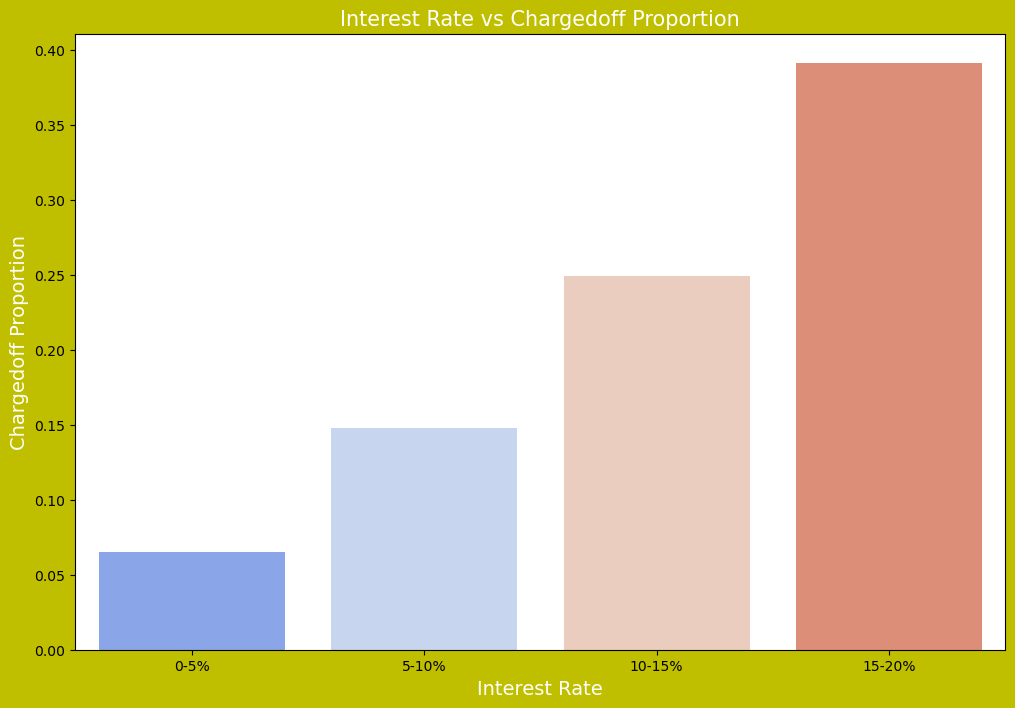

In [191]:
import matplotlib.pyplot as plt
import snsborn as sns

# Create the bar plot with a color palette
fig, ax1 = plt.subplots(figsize=(12, 8), facecolor='y')
ax1.set_title('Interest Rate vs Chargedoff Proportion', fontsize=15, color='w')

# Define a color palette, for example 'coolwarm' or any other palette
palette = sns.color_palette("coolwarm", len(interest_vs_loan))

# Create the bar plot with the custom color palette
ax1 = sns.barplot(x='int_rate_b', y='Chargedoff_Proportion', data=interest_vs_loan, palette=palette)

# Customize labels
ax1.set_xlabel('Interest Rate', fontsize=14, color='w')
ax1.set_ylabel('Chargedoff Proportion', fontsize=14, color='w')

# Show the plot
plt.show()

In [192]:
#Bivariate Analysis of Home Ownership against Chargedoff_Proportion -

home_ownership_vs_loan = loan_df.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_Proportion'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,OTHER,16.0,71.0,87.0,0.183908
4,RENT,2530.0,14436.0,16966.0,0.149122
3,OWN,363.0,2165.0,2528.0,0.143592
0,MORTGAGE,1883.0,12280.0,14163.0,0.132952
1,NONE,0.0,3.0,3.0,0.000000


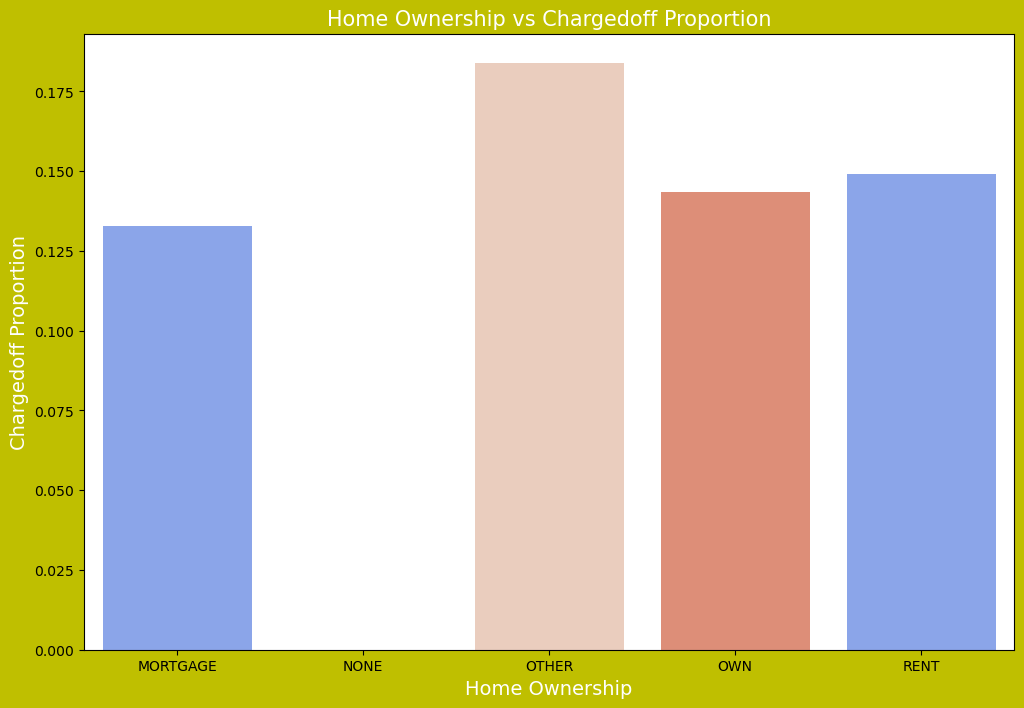

In [193]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Home Ownership vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='home_ownership', y='Chargedoff_Proportion', data=home_ownership_vs_loan, palette=palette)
ax1.set_xlabel('Home Ownership',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.show()

In [194]:
#Bivariate Analysis on Purpose of loan against Chargedoff_Proportion -

purpose_vs_loan = loan_df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_Proportion
11,small_business,377,1025,1402,0.268902
10,renewable_energy,16,67,83,0.192771
5,house,50,249,299,0.167224
3,educational,49,245,294,0.166667
8,moving,82,437,519,0.157996
9,other,540,2897,3437,0.157114
7,medical,95,514,609,0.155993
2,debt_consolidation,2366,13470,15836,0.149406
12,vacation,49,286,335,0.146269
4,home_improvement,282,2051,2333,0.120874


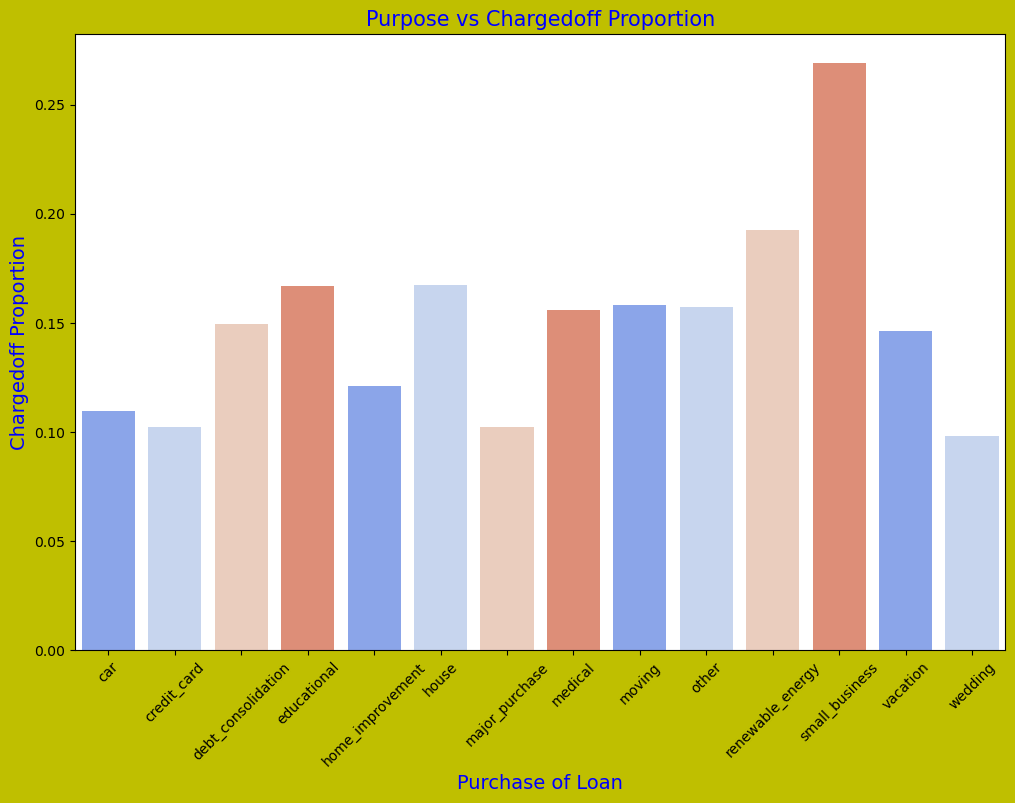

In [195]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Purpose vs Chargedoff Proportion',fontsize=15,color='b')
ax1=sns.barplot(x='purpose', y='Chargedoff_Proportion', data=purpose_vs_loan,palette=palette)
ax1.set_xlabel('Purchase of Loan',fontsize=14,color='b')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'b')
plt.xticks(rotation=45)
plt.show()

In [196]:
#Bivariate Analysis on DTI against Chargedoff_Proportion -
# Define bins and labels for DTI (Debt-to-Income ratio)
dti_bins = [0, 10, 20,  float('inf')]
dti_labels = ['0-10%', '10-20%', '20-30%']

# Create the binned DTI column
loan_df['dti_b'] = pd.cut(loan_df['dti'], bins=dti_bins, labels=dti_labels, right=False)

dti_vs_loan = loan_df.groupby(['dti_b', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
dti_vs_loan['Total'] = dti_vs_loan['Charged Off']+ dti_vs_loan['Fully Paid']
dti_vs_loan['Chargedoff_Proportion'] = dti_vs_loan['Charged Off'] / dti_vs_loan['Total']
dti_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,dti_b,Charged Off,Fully Paid,Total,Chargedoff_Proportion
2,20-30%,1053,5453,6506,0.161851
1,10-20%,2385,13893,16278,0.146517
0,0-10%,1354,9609,10963,0.123506


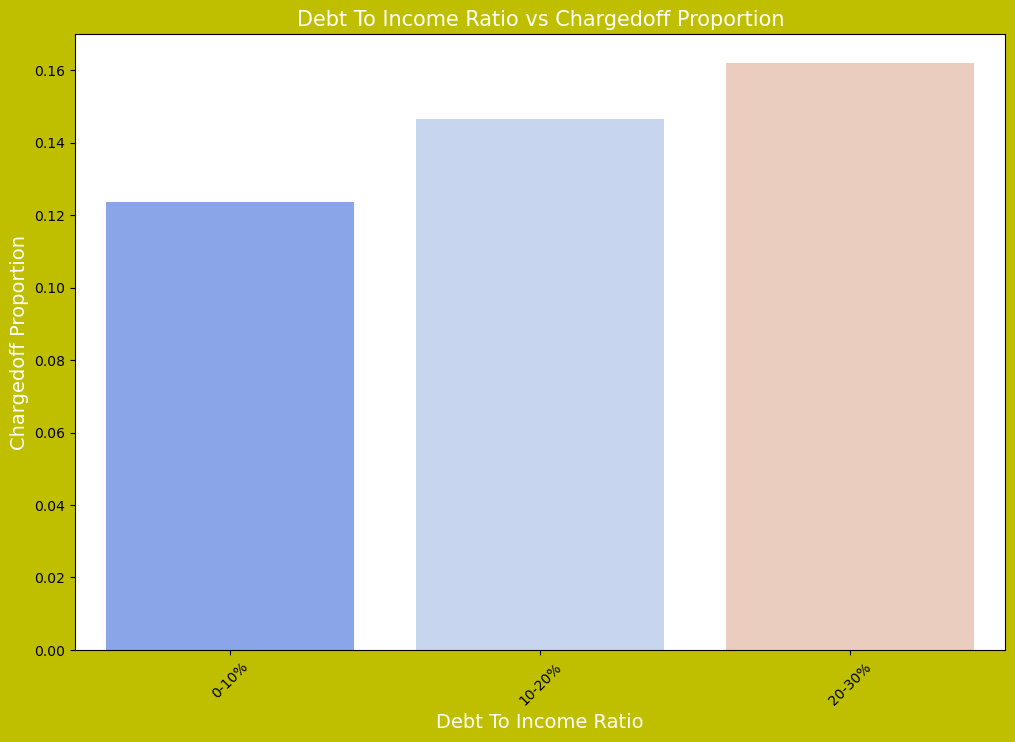

In [197]:
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Debt To Income Ratio vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='dti_b', y='Chargedoff_Proportion', data=dti_vs_loan, palette=palette)
ax1.set_xlabel('Debt To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

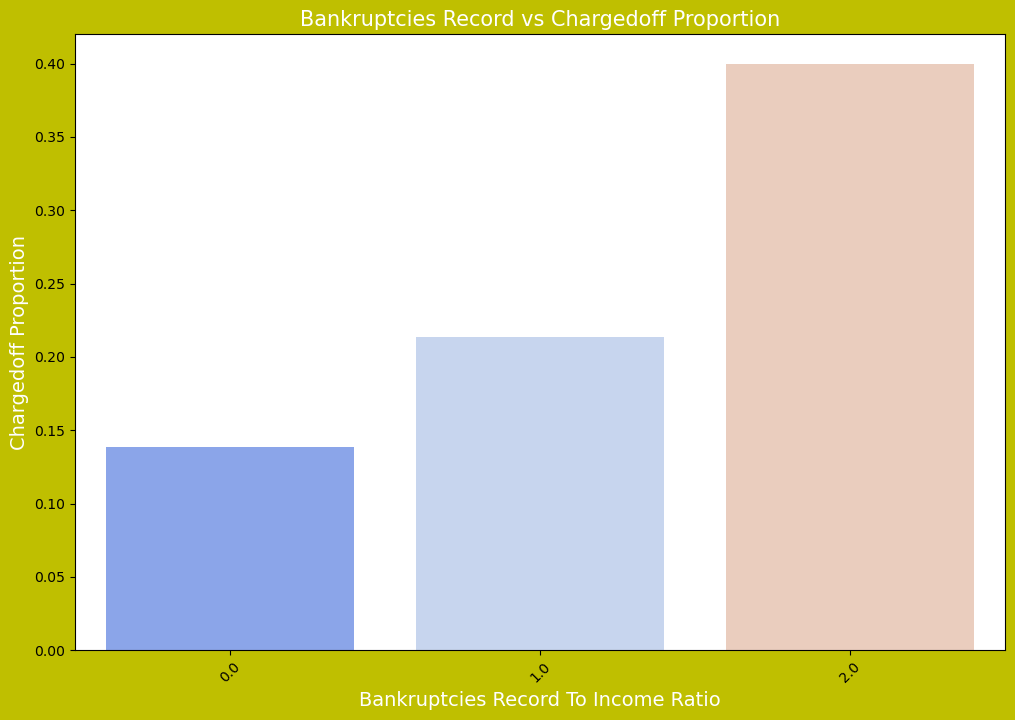

In [199]:
pub_rec_bankruptcies_vs_loan = loan_df.groupby(['pub_rec_bankruptcies', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_vs_loan['Total'] = pub_rec_bankruptcies_vs_loan['Charged Off']+ pub_rec_bankruptcies_vs_loan['Fully Paid']
pub_rec_bankruptcies_vs_loan['Chargedoff_Proportion'] = pub_rec_bankruptcies_vs_loan['Charged Off'] / pub_rec_bankruptcies_vs_loan['Total']
pub_rec_bankruptcies_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Bankruptcies Record vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='pub_rec_bankruptcies', y='Chargedoff_Proportion', data=pub_rec_bankruptcies_vs_loan, palette=palette)
ax1.set_xlabel('Bankruptcies Record To Income Ratio',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

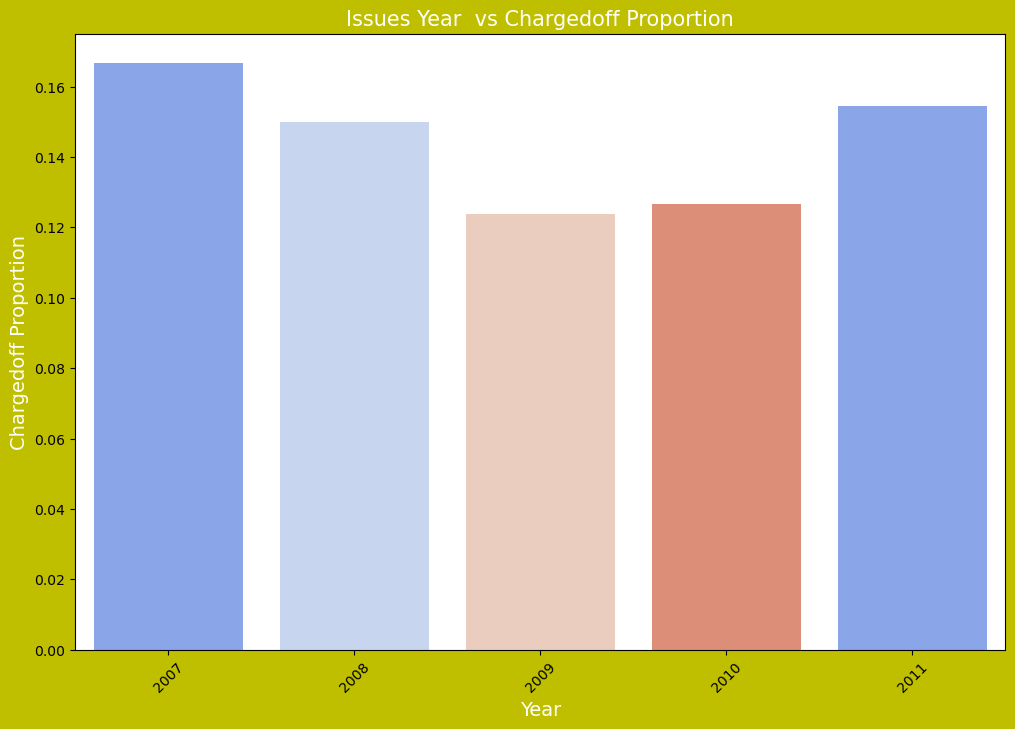

In [200]:
# #Bivariate Analysis on Issues of Year  against Chargedoff_Proportion -
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')  # Adjust format as needed
loan_df['issue_year'] = loan_df['issue_d'].dt.year

issue_year_vs_loan = loan_df.groupby(['issue_year', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_Proportion'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Issues Year  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='issue_year', y='Chargedoff_Proportion', data=issue_year_vs_loan, palette=palette )
ax1.set_xlabel('Year',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

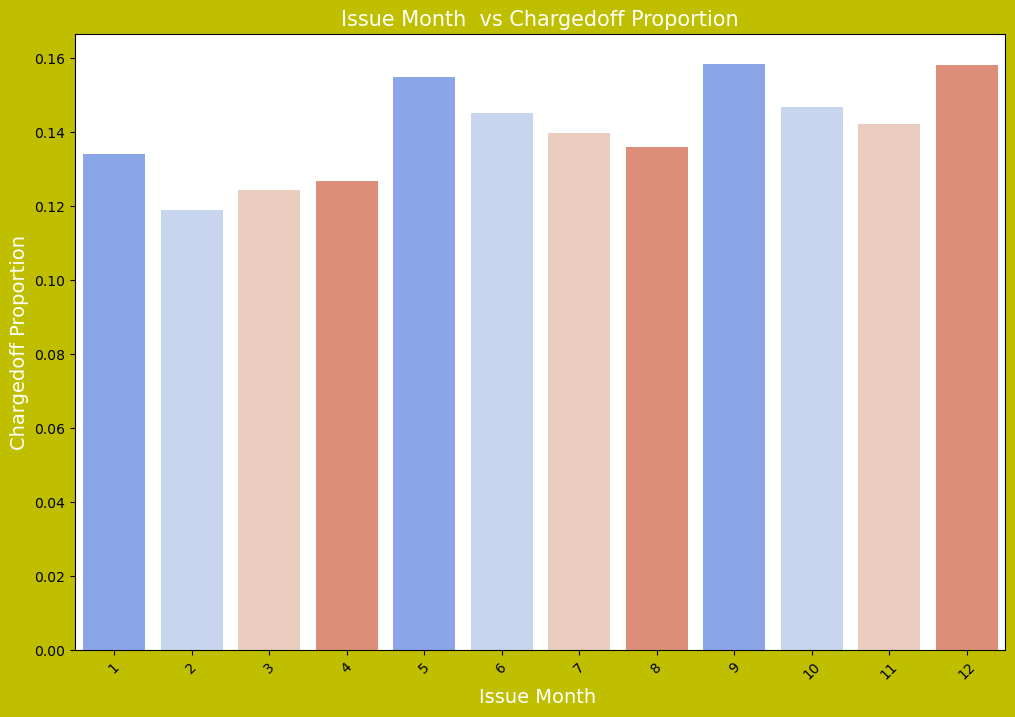

In [201]:
# #Bivariate Analysis on Month of Issue of loan Record against Chargedoff_Proportion -
loan_df['issue_d'] = pd.to_datetime(loan_df['issue_d'], format='%b-%y')  # Adjust the format if needed
loan_df['issue_month'] = loan_df['issue_d'].dt.month

issue_month_vs_loan = loan_df.groupby(['issue_month', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_month_vs_loan['Total'] = issue_month_vs_loan['Charged Off']+ issue_month_vs_loan['Fully Paid']
issue_month_vs_loan['Chargedoff_Proportion'] = issue_month_vs_loan['Charged Off'] / issue_month_vs_loan['Total']
issue_month_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Issue Month  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='issue_month', y='Chargedoff_Proportion', data=issue_month_vs_loan, palette=palette )
ax1.set_xlabel('Issue Month ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

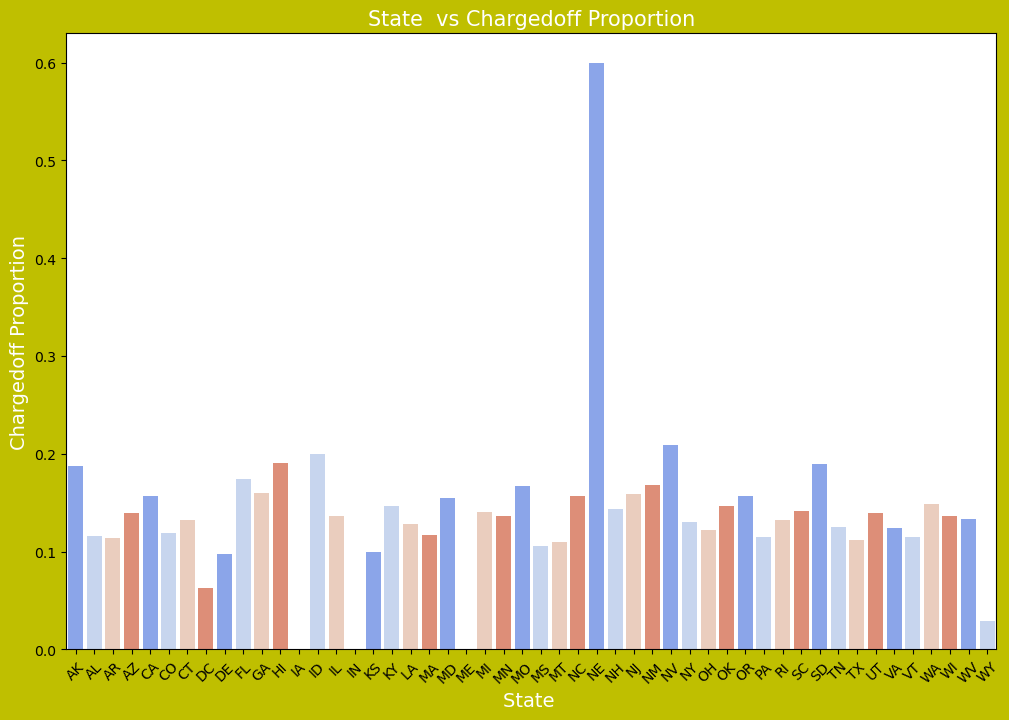

In [202]:
# #Bivariate Analysis on Address state  against Chargedoff_Proportion -

addr_state_vs_loan = loan_df.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
addr_state_vs_loan['Total'] = addr_state_vs_loan['Charged Off']+ addr_state_vs_loan['Fully Paid']
addr_state_vs_loan['Chargedoff_Proportion'] = addr_state_vs_loan['Charged Off'] / addr_state_vs_loan['Total']
addr_state_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('State  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='addr_state', y='Chargedoff_Proportion', data=addr_state_vs_loan, palette=palette)
ax1.set_xlabel('State ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

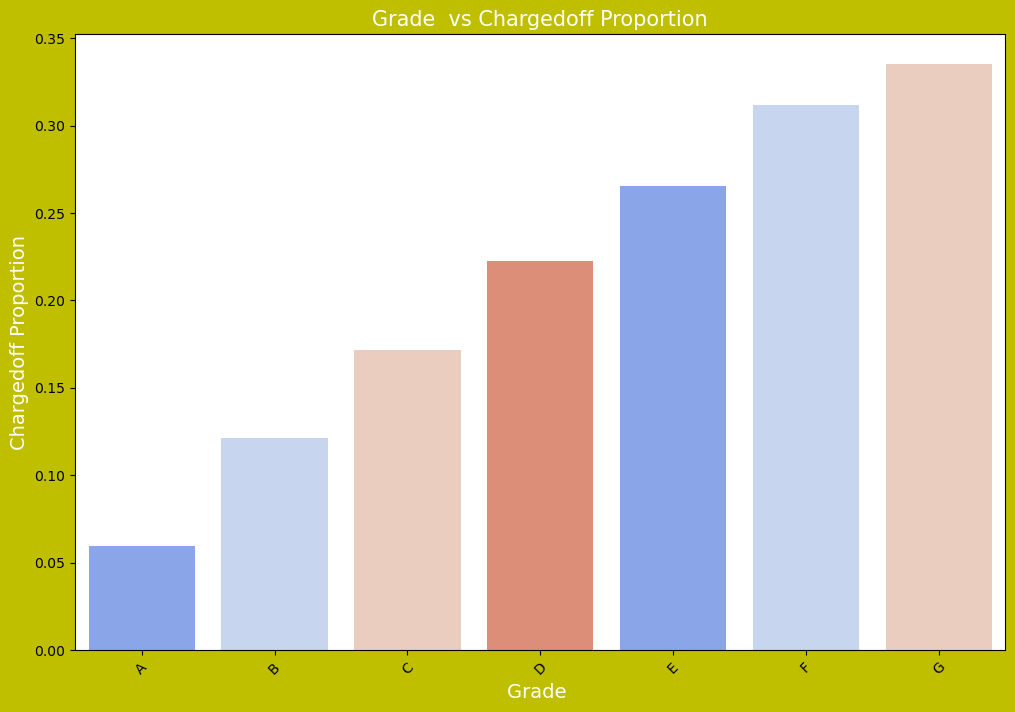

In [203]:
# #Bivariate Analysis on Grade against Chargedoff_Proportion -

grade_vs_loan = loan_df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off']+ grade_vs_loan['Fully Paid']
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)


# graph
fig, ax1 = plt.subplots(figsize=(12, 8),facecolor='y')
ax1.set_title('Grade  vs Chargedoff Proportion',fontsize=15,color='w')
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan,  palette=palette)
ax1.set_xlabel('Grade ',fontsize=14,color='w')
ax1.set_ylabel('Chargedoff Proportion',fontsize=14,color = 'w')
plt.xticks(rotation=45)
plt.show()

#### Correlation Analysis

In [212]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33747 entries, 0 to 39716
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   loan_amnt                 33747 non-null  int64         
 1   funded_amnt               33747 non-null  int64         
 2   funded_amnt_inv           33747 non-null  float64       
 3   term                      33747 non-null  float64       
 4   int_rate                  33747 non-null  float64       
 5   installment               33747 non-null  float64       
 6   grade                     33747 non-null  object        
 7   emp_length                33747 non-null  object        
 8   home_ownership            33747 non-null  object        
 9   annual_inc                33747 non-null  float64       
 10  verification_status       33747 non-null  object        
 11  issue_d                   33747 non-null  datetime64[ns]
 12  loan_status            

In [219]:
loan_corr = loan_df[['funded_amnt_inv', 'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_util', 'pub_rec_bankruptcies','loan_amnt','funded_amnt','delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal','total_acc' ]]

In [220]:
loan_corr.head()

,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,revol_util,pub_rec_bankruptcies,loan_amnt,funded_amnt,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc
0,4975.0,3.0,10.65,162.87,24000.0,27.65,83.7,0.0,5000,5000,0,1,3,0,13648,9
1,2500.0,6.0,15.27,59.83,30000.0,1.00,9.4,0.0,2500,2500,0,5,3,0,1687,4
2,2400.0,3.0,15.96,84.33,12252.0,8.72,98.5,0.0,2400,2400,0,2,2,0,2956,10
3,10000.0,3.0,13.49,339.31,49200.0,20.00,21.0,0.0,10000,10000,0,1,10,0,5598,37
5,5000.0,3.0,7.90,156.46,36000.0,11.20,28.3,0.0,5000,5000,0,3,9,0,7963,12


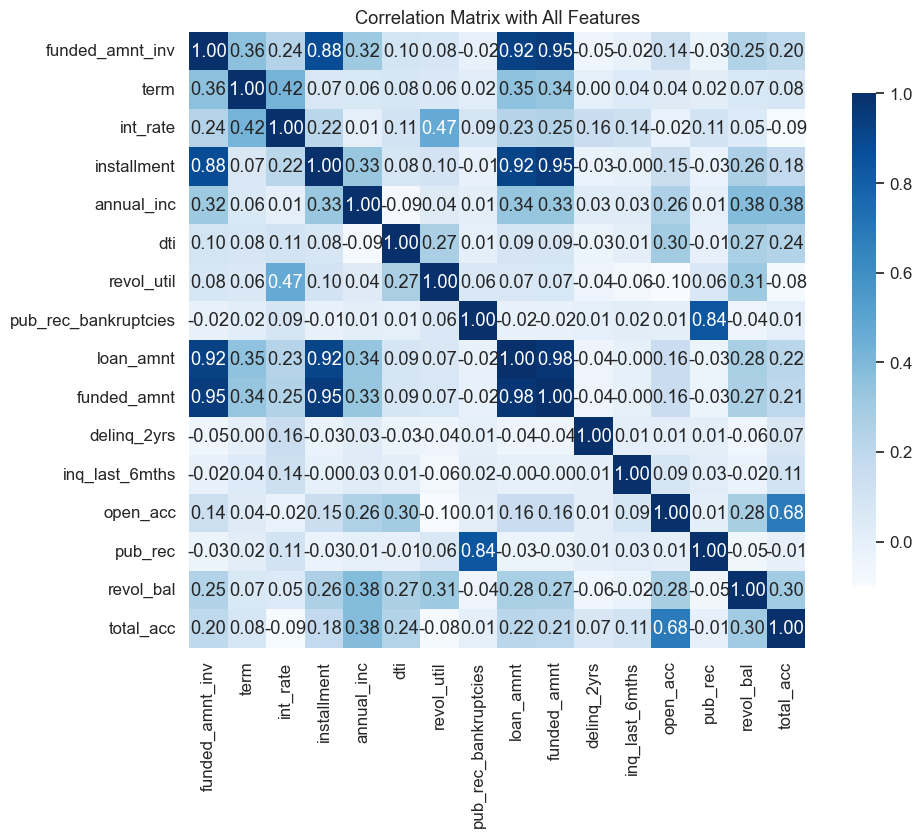

In [223]:
corr = loan_corr.corr()
sns.set(font_scale=1.1)
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix with All Features')
plt.show()

##### Conclusion:
- annual income and dti has a negative corelation
- loan amount has negative correlation with publicly recorded bankruptcies
- loan amount and funded amount has positive correlation 